In [3]:
'''
Visualize control signal and voltage output of HV Controller
Author: Yitian Shao
Created on 2022.08.12
'''

from os import walk
import os.path as ospa
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import pandas as pd
from scipy import signal
import seaborn as sns

plt.rc('font', size=10, family='Verdana') # 'Tahoma', 'DejaVu Sans', 'Verdana'"
plt.rc('axes', edgecolor='0.5', linewidth=0.75)
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams.update({'errorbar.capsize': 4})

figSize_inch = (3.2, 2.4)

In [4]:
'''
General Functions
'''

def aPlot(figName='', is3D = False, dpi=72):
    ax = []
    
    fig1 = plt.figure(figsize = (6,3), dpi=dpi)
    
    fig1.suptitle(figName, fontsize=16)
    if(is3D):
        ax = fig1.add_subplot(111, projection='3d')
    else:
        ax = fig1.add_subplot(111)
        
    return ax, fig1

def yyAxisPlot(x0, y0, x1, y1, xText=None, y0Text=None, y1Text=None):
    ax0, fig0 = aPlot(); 
    ax0.set_xlabel(xText)
    ax0.plot(x0, y0, color='tab:orange'); 
    ax0.set_ylabel(y0Text, color='tab:orange')
    ax0.tick_params(axis='y', labelcolor='tab:orange')

    ax1 = ax0.twinx()
    ax1.plot(x1, y1, color='tab:blue');
    ax1.set_ylabel(y1Text, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    fig0.tight_layout() 
    
def sample2Time(ax, Fs): # Covert the xticks of current plot from samples to time using Fs
    locs, _ = plt.xticks()
    plt.xticks(locs, locs/Fs)
    ax.set_xlim(0, locs[-1])
    ax.set_xlabel('Time (secs)')

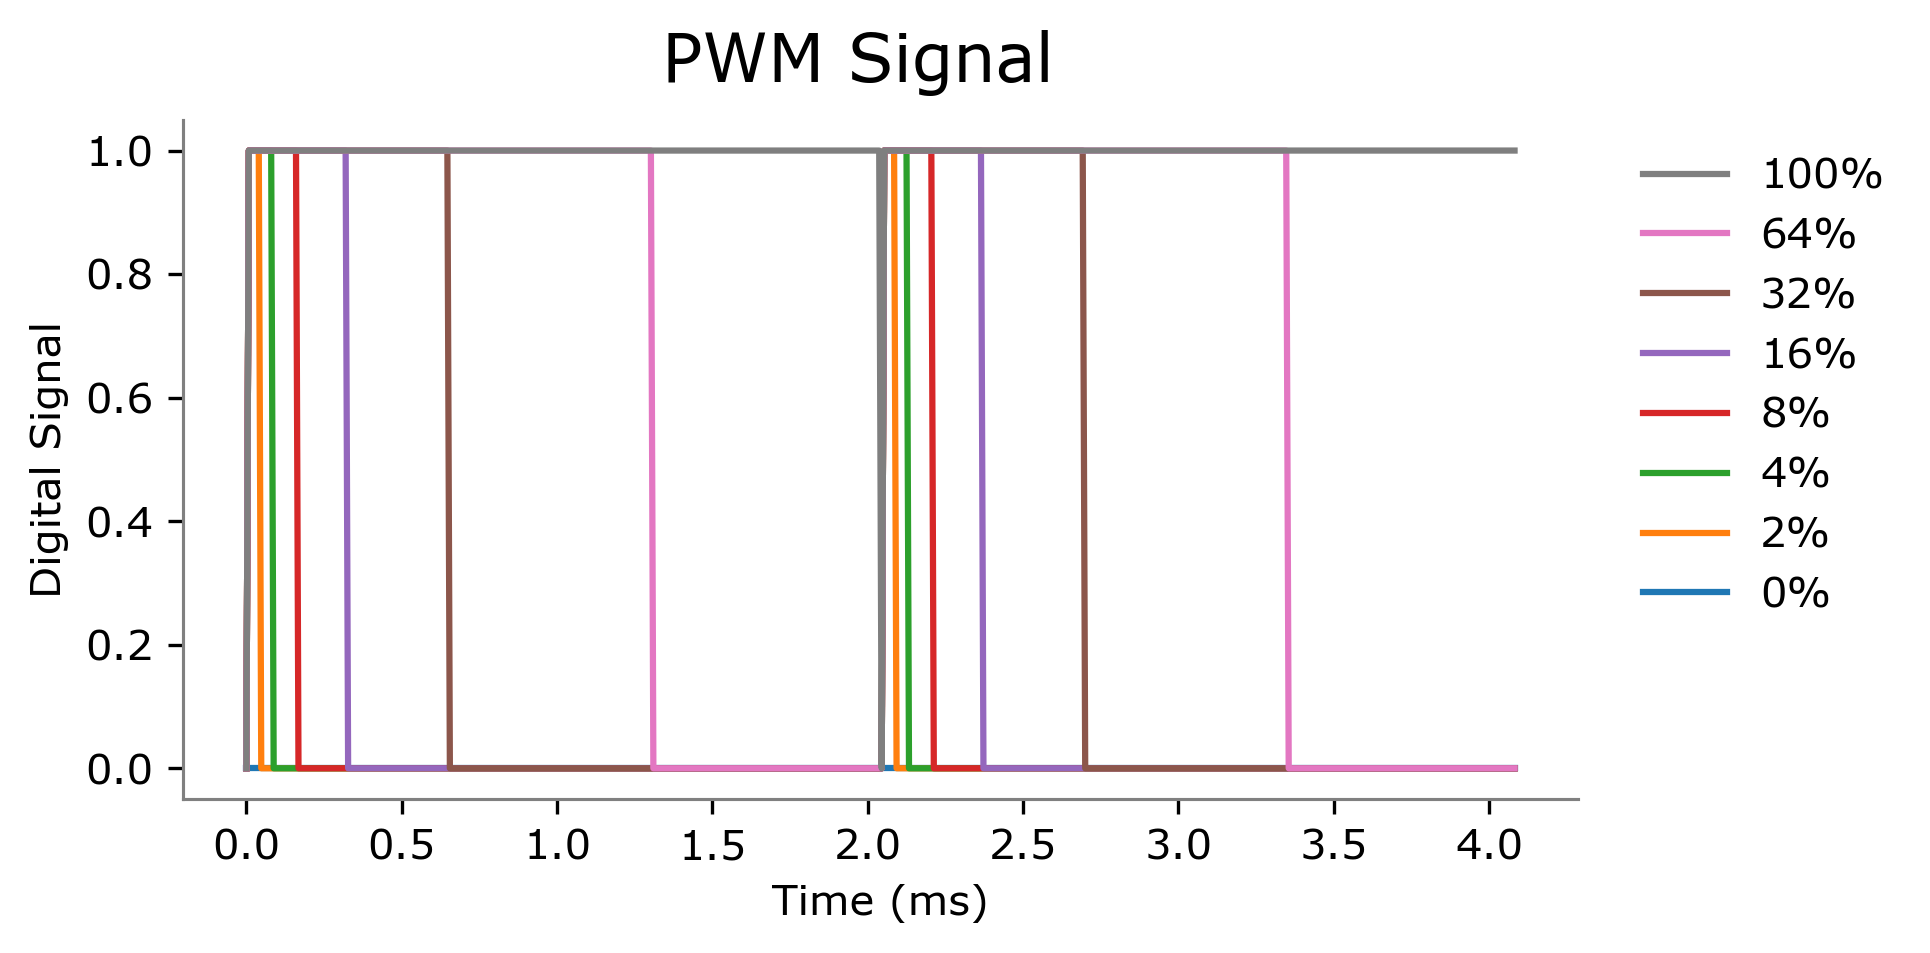

In [5]:
# PWMGain - 0 to 100% ( PWMGain = 255*voltageLevel/100 )
# chargeDuration - 0.2 to 1.6 sec
# dischargeDuration - 4.0 sec

vLevels = [ 0,   2,   4,   8,  16,  32,  64, 100]

cycleFs = 490 # Arduino PWM frequency = 490 Hz

dispDuration = 0.1 # sec

ax, fig1 = aPlot(figName='PWM Signal', dpi=300)

cycleNum = 2

labelStr = ["%d%%" % x for x in vLevels]

pltHandles = []
for voltageLevel in vLevels:
    PWMGain = int(255*voltageLevel/100)
    y = np.zeros((256,1))
    y[1:PWMGain+1] = 1

    y = np.tile(y, (cycleNum,1))

#     samps = np.arange(y.shape[0])
    t = np.linspace(0, cycleNum/cycleFs, y.shape[0]) * 1000 # ms

    pltHandles.append(ax.plot(t, y)[0])

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Digital Signal")
ax.legend(handles=reversed(pltHandles), labels=reversed(labelStr), frameon=False, bbox_to_anchor=(1.02, 1.0), loc='upper left')

fig1.savefig("PWMsignal.pdf", bbox_inches='tight')